In [1]:
# Importing important libraries
import pandas as pd
import seaborn as sns
from textblob import TextBlob
from sklearn.model_selection import train_test_split
import nltk
from gensim.models import Word2Vec
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading csv file into dataframe
reviews = pd.read_csv("/content/drive/MyDrive/updated_mobile_reviews_lang_new.csv",index_col=False)

<ipython-input-3-7899bef05eff>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv("/content/drive/MyDrive/updated_mobile_reviews_lang_new.csv",index_col=False)


In [4]:
reviews.shape

(82816, 11)

In [5]:
reviews.head()

,Unnamed: 0,asin,name,rating,date,verified,title,title_lang,body,body_lang,helpfulVotes
0,0.0,B0000SX2UC,Janet,3.0,"October 11, 2005",False,"Def not best, but not worst",en,I had the Samsung A600 for awhile which is abs...,en,1.0
1,1.0,B0000SX2UC,Luke Wyatt,1.0,"January 7, 2004",False,Text Messaging Doesn't Work,en,Due to a software issue between Nokia and Spri...,en,17.0
2,2.0,B0000SX2UC,Brooke,5.0,"December 30, 2003",False,Love This Phone,en,"This is a great, reliable phone. I also purcha...",en,5.0
3,3.0,B0000SX2UC,amy m. teague,3.0,"March 18, 2004",False,"Love the Phone, BUT...!",en,"I love the phone and all, because I really did...",en,1.0
4,4.0,B0000SX2UC,tristazbimmer,4.0,"August 28, 2005",False,"Great phone service and options, lousy case!",en,The phone has been great for every purpose it ...,en,1.0


In [6]:
# Selecting only those reviews that have either the title or body or both in english language
reviews = reviews[(reviews['title_lang'] == 'en') | (reviews['body_lang'] == 'en')]
reviews.shape

(80033, 11)

In [7]:
reviews.columns

Index(['Unnamed: 0', 'asin', 'name', 'rating', 'date', 'verified', 'title',
       'title_lang', 'body', 'body_lang', 'helpfulVotes'],
      dtype='object')

In [8]:
 #Removing columns that are not required:
reviews = reviews.drop(columns=['Unnamed: 0', 'asin', 'name', 'date', 'verified', 'helpfulVotes'])
reviews.columns

Index(['rating', 'title', 'title_lang', 'body', 'body_lang'], dtype='object')

In [9]:
# Checking for NaN
reviews.isnull().values.any()

True

In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80033 entries, 0 to 82815
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rating      80032 non-null  float64
 1   title       80022 non-null  object 
 2   title_lang  80033 non-null  object 
 3   body        80012 non-null  object 
 4   body_lang   80033 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.7+ MB


Getting all the rows that have atleast 1 NaN to observe and take a decision on what to do with them

In [11]:
reviews[reviews['rating'].isnull()]

,rating,title,title_lang,body,body_lang
82815,NaN,NaN,en,NaN,en


In [12]:
reviews[reviews['title'].isnull()]

,rating,title,title_lang,body,body_lang
27707,1.0,NaN,en,Battery doesn't work as new one...,en
45093,5.0,NaN,en,Almost like pretty new,en
46648,5.0,NaN,en,Love this phone. Everything's worked great. So...,en
63737,5.0,NaN,en,"I get that phone I needed ,, thanks .",en
64792,5.0,NaN,en,Love the phone,en
65788,5.0,NaN,en,Great phone,en
68747,5.0,NaN,en,Great phone...A++,en
78216,5.0,NaN,en,It was s good purchase,en
79129,5.0,NaN,en,Good value for price!,en
80337,5.0,NaN,en,It was okay no dislikes yet,en


In [13]:
reviews[reviews['body'].isnull()]

,rating,title,title_lang,body,body_lang
9840,3.0,Three Stars,en,NaN,en
19026,4.0,Four Stars,en,NaN,en
21385,5.0,Nice and fast shipment,en,NaN,en
21394,1.0,Damaged,en,NaN,en
23640,2.0,The Wrong Phone Color,en,NaN,en
24644,1.0,One Star,en,NaN,en
26433,2.0,The Wrong Phone Color,en,NaN,en
28359,1.0,DON'T BUY FROM CLEAN ELECTRIC!!!!!,en,NaN,en
28605,1.0,I regret this purchase!,en,NaN,en
39664,5.0,Hi,en,NaN,en


In [14]:
# Replacing NaN values of title with empty string
reviews[['title','body' ]] = reviews[['title','body' ]].fillna('')
# Removing rows that don't have any rating 
reviews = reviews.dropna(subset=['rating'])

In [15]:
# Checking for NaN
reviews.isnull().values.any()

False

In [16]:
# Create quick lambda functions to find the polarity of each review based on rating
# 4.0-5.0 : Postive
# 3.0 : Neutral
# 1.0-2.0 : Negative

reviews["sentiment"] = reviews["rating"].apply(lambda x: 'Positive' if x>3 else('Neutral' if x==3 else 'Negative'))

In [17]:
reviews.head()

,rating,title,title_lang,body,body_lang,sentiment
0,3.0,"Def not best, but not worst",en,I had the Samsung A600 for awhile which is abs...,en,Neutral
1,1.0,Text Messaging Doesn't Work,en,Due to a software issue between Nokia and Spri...,en,Negative
2,5.0,Love This Phone,en,"This is a great, reliable phone. I also purcha...",en,Positive
3,3.0,"Love the Phone, BUT...!",en,"I love the phone and all, because I really did...",en,Neutral
4,4.0,"Great phone service and options, lousy case!",en,The phone has been great for every purpose it ...,en,Positive


In [18]:
reviews.sentiment.value_counts()

Positive    53585
Negative    20796
Neutral      5651
Name: sentiment, dtype: int64

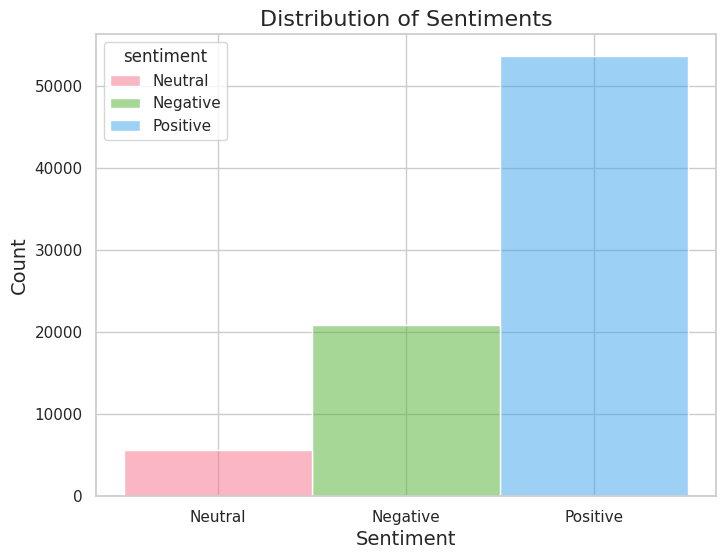

In [19]:
# Sentiments distribution

# Create a histogram plot using Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=reviews, x='sentiment', hue='sentiment', palette='husl')
ax.set_title('Distribution of Sentiments', fontsize=16)
ax.set_xlabel('Sentiment', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Show the plot
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


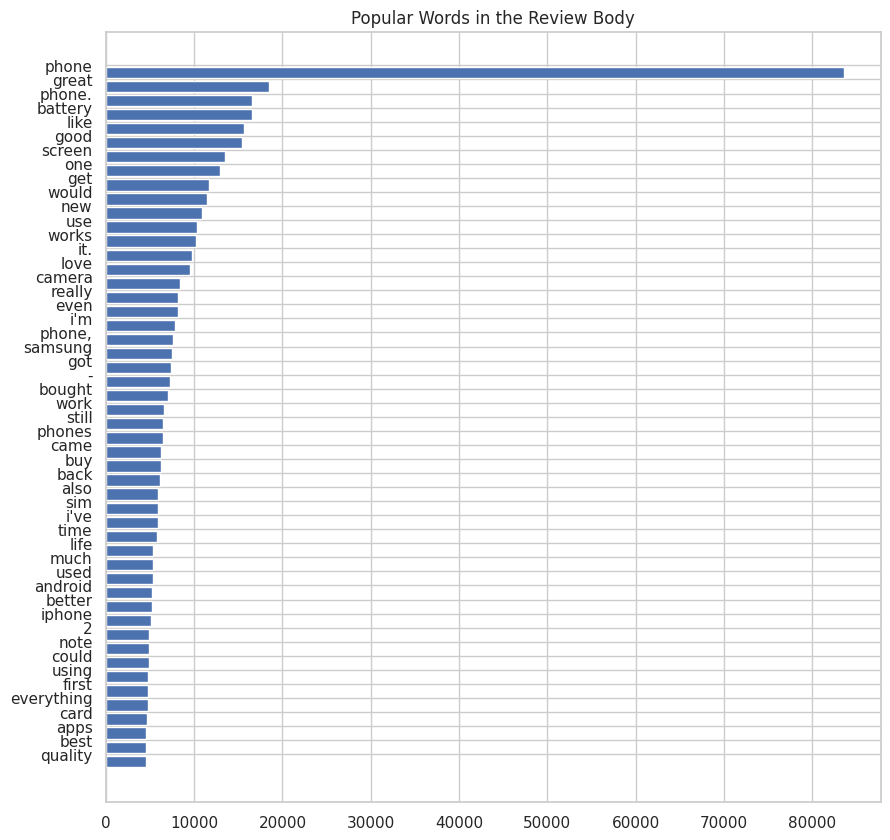

In [20]:
#Visualisation of data 
#nltk.download('stopwords')
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stop_words]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

plt.figure(figsize=(10,10))
wordBarGraphFunction(reviews,'body',"Popular Words in the Review Body")


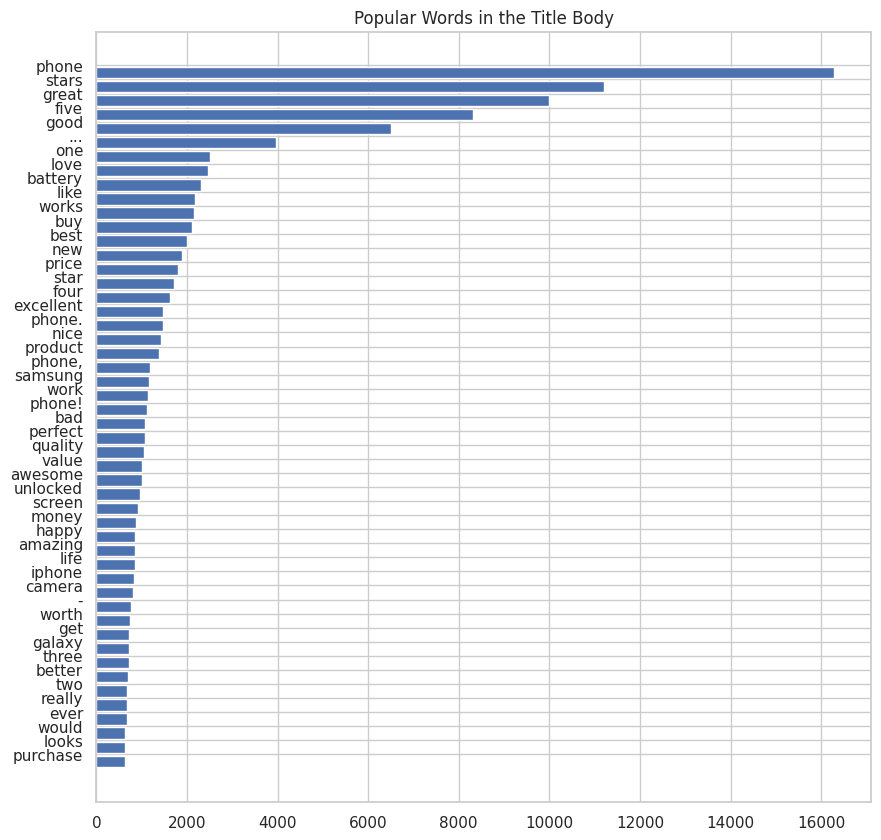

In [21]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(reviews,'title',"Popular Words in the Title Body")

In [22]:
#Check for duplicate reviews:
reviews[reviews.duplicated()]

,rating,title,title_lang,body,body_lang,sentiment
830,5.0,Five Stars,en,works great,en,Positive
958,5.0,Five Stars,en,Excellent,en,Positive
1262,5.0,Five Stars,en,Excellent,en,Positive
1280,5.0,Five Stars,en,Good,en,Positive
1352,5.0,Five Stars,en,Good,en,Positive
...,...,...,...,...,...,...
82796,5.0,I,en,I loved it,en,Positive
82797,5.0,I like it.,en,Best forever,en,Positive
82798,5.0,Basically Perfect and Brand New (ignore the an...,en,I was a little bit scared of my purchase given...,en,Positive
82799,5.0,New Phone for Half Price,en,I got a new phone for half the price!!! 100% b...,en,Positive


In [23]:
reviews = reviews.drop_duplicates(subset=['title', 'body'], keep='first')

In [24]:
reviews.shape

(72931, 6)

In [25]:
#Remove stop words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
    return ' '.join(filtered_words)

reviews['title'] = reviews['title'].apply(remove_stopwords)
reviews['body'] = reviews['body'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
#Reference-> https://www.kaggle.com/code/naureenmohammad/nlp-on-disaster-tweet-final
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
abbreviations = pd.read_csv("Abbreviations and Slang.csv")
abrevtn_dic = dict(zip(abbreviations.Abbreviations, abbreviations.Text))

def abbrev2_word(word):
    word= word.lower()
    if word in abrevtn_dic.keys():
        return abrevtn_dic[word]
    else: 
        return word

def abbrev2_text(text):
    sentnc = word_tokenize(text)
    sentnc = [abbrev2_word(word) for word in sentnc]
    text = ' '.join(sentnc)
    return text

reviews["title"] = reviews["title"].apply(lambda x: abbrev2_text(x))
reviews["body"] = reviews["body"].apply(lambda x: abbrev2_text(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
import re
pattern = r'(\w)\1{3,}'
def remove_repeating_chars(text):
#replace repeating character with single charater
    return re.sub(pattern, r'\1', text)
reviews['title'] = reviews['title'].apply(remove_repeating_chars)
reviews['body'] = reviews['body'].apply(remove_repeating_chars)

In [28]:
#remove punctuations
import string

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
reviews['title'] = reviews['title'].apply(remove_punctuation)
reviews['body'] = reviews['body'].apply(remove_punctuation)

In [ ]:
pip install autocorrect

In [ ]:
#spelling corrections
#Reference-> https://dataaspirant.com/nlp-text-preprocessing-techniques-implementation-python/#t-1600077497355
from autocorrect import Speller

# create an instance of the Speller class for english language
spell = Speller(lang='en')

def correct_spelling(text):
    corrected_words = [spell(word) for word in text.split()]
    corrected_text = ' '.join(corrected_words)
    return corrected_text

reviews['title'] = reviews['title'].apply(correct_spelling)
#reviews['body'] = reviews['body'].apply(correct_spelling)

In [ ]:
reviews['body'] = reviews['body'].apply(correct_spelling)

In [29]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)
    
reviews['title'] = reviews['title'].apply(lemmatize_text)
reviews['body'] = reviews['body'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from sklearn.model_selection import train_test_split

In [39]:
from keras.layers import Dense, Embedding, Bidirectional, LSTM
# Convert sentiment labels to numerical values
reviews['sentiment_num1'] = reviews['sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(reviews['body'], reviews['sentiment_num1'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data)

# Convert the text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

# Pad the sequences to a fixed length
max_length = 100
train_data_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_data_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')

# Build the Bidirectional RNN model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=max_length))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data_padded, train_labels, epochs=10, batch_size=128)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data_padded, test_labels)
print("Test Accuracy: ", test_accuracy)

Epoch 1/10
456/456 [==============================] - 72s 145ms/step - loss: -1.2606 - accuracy: 0.4526
Epoch 2/10
456/456 [==============================] - 66s 145ms/step - loss: -5.0241 - accuracy: 0.5209
Epoch 3/10
456/456 [==============================] - 67s 146ms/step - loss: -10.6706 - accuracy: 0.5597
Epoch 4/10
456/456 [==============================] - 66s 146ms/step - loss: -17.7235 - accuracy: 0.5851
Epoch 5/10
456/456 [==============================] - 70s 153ms/step - loss: -23.8600 - accuracy: 0.5872
Epoch 6/10
456/456 [==============================] - 71s 156ms/step - loss: -28.9106 - accuracy: 0.5859
Epoch 7/10
456/456 [==============================] - 66s 146ms/step - loss: -33.4857 - accuracy: 0.5786
Epoch 8/10
456/456 [==============================] - 67s 146ms/step - loss: -39.5236 - accuracy: 0.5750
Epoch 9/10
456/456 [==============================] - 68s 148ms/step - loss: -44.6820 - accuracy: 0.5645
Epoch 10/10
456/456 [==============================] - 9s